# Binomial model - Case studies

# _Josep Fortiana  &emsp;&emsp;&emsp;&emsp;&emsp;   2023-03-13_

# Case study 2: Drug response

We are interested in the response of patients to a drug. 

We believe a proportion somewhere between 0.2 and 0.6 of patients will respond, with a mean of 0.4 and a standard deviation of 0.1.

In a study of 20 persons, what is the probability that 15 or more will respond? 

The problem involves a Bernoulli (or Binomial) likelihood. 

We use a Beta prior (this is the easy path, see below more involved possibilities). 

To translate the prior information $\mu=0.4$, $\sigma=0.1$ into parameters of a $\mbox{Beta}(\alpha,\beta)$, we isolate $\alpha$, $\beta$ from the formulas for the moments of a Beta distribution:

$$
\begin{array}{lcl}
    \mu         &=&\dfrac{\alpha}{\alpha+\beta},\\[0.4cm]
    \sigma^{2}  &=&\dfrac{\alpha\,\beta}{(\alpha+\beta)^{2}\,(\alpha+\beta+1)}.
\end{array}
$$

The result is:

$$
\begin{array}{lcl}
    \alpha  &=&\mu\cdot\left[\dfrac{\mu\,(1-\mu)}{\sigma^{2}}-1\right],\\[0.4cm]
    \beta   &=&(1-\mu)\cdot\left[\dfrac{\mu\,(1-\mu)}{\sigma^{2}}-1\right].
\end{array}
$$

In [1]:
# For a Beta(a,b) distribution, the mean and variance are
# mu<-a/(a+b)
# sigma2<-ab/((a+b)^2*(a+b+1))
# 
# Solving a,b in terms of mu, sigma2
# 
mu<-0.4
sigma<-0.1
sigma2<-sigma^2
G<-(mu*(1-mu))/sigma2-1
a<-mu*G
b<-(1-mu)*G
# 
round(a,2)
round(b,2)

[1] 9.2

[1] 13.8

In our case: $\alpha=9.2$, $\beta=13.8$.

The question we are asked, the probability that 15 or more patients will respond,    
is previous to any experimental evidence,    
hence we will get the answer from the **prior predictive distribution** of    
the number $X$ of patients responding to treatment out of the $n=20$ patients participating in the study, using only prior information. 

We know this r.v. follows a $\mbox{Beta-Binomial}(20,9.2,13.8)$ distribution. 

Thus, in principle we could use this distribution, which can be found in the `extraDistr` package. 

Thus we can plot the pmf and compute the exact probability we are asked:

In [2]:
#install.packages("extraDistr",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(extraDistr,quietly=TRUE)

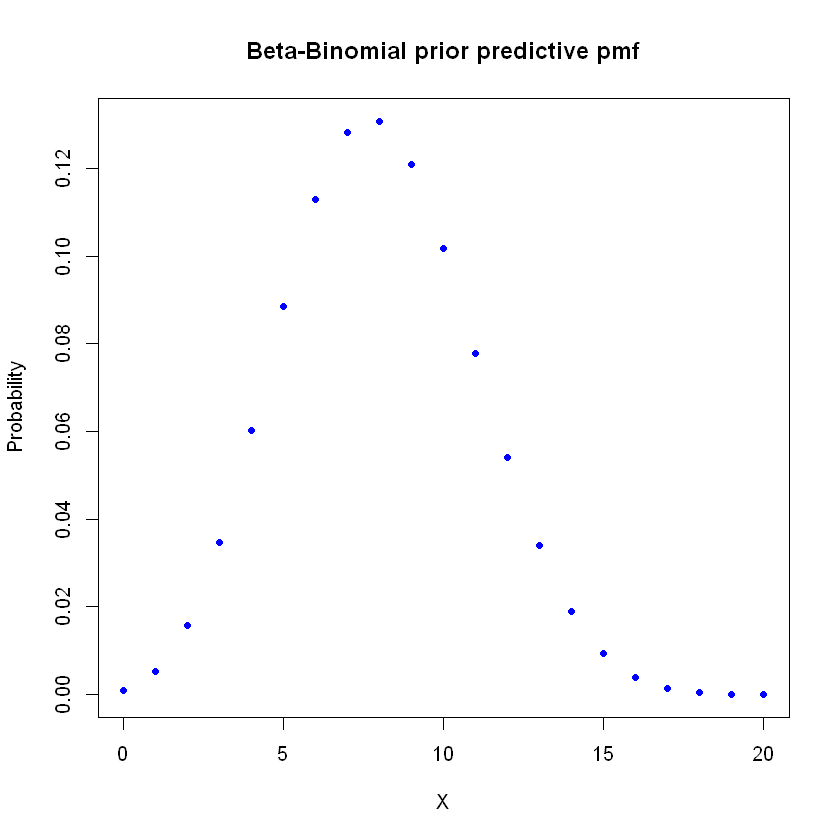

In [3]:
options(repr.plot.width=7,repr.plot.height=7)
X<-0:20
plot(X,dbbinom(X, size=20, alpha = 9.2, beta = 13.8),pch=19,cex=0.8,col="blue"
                 ,main="Beta-Binomial prior predictive pmf",ylab="Probability")

In [4]:
P15.exact<-1-pbbinom(14, size=20, alpha = 9.2, beta = 13.8)
round(P15.exact,3)

[1] 0.015

### Alternative approach

Both more general in scope (only rarely will we know an explicit pdf for the prior predictive) and more according to a computational statistics mindset   
is to sample from this distribution by simulation and infer the desired properties from the resulting sample.

We generate a number $N$  of realizations of the experiment. 

In each one of them $\theta$ is generated from a $\mbox{Beta}(\alpha,\beta)=\mbox{Beta}(9.2,13.8)$, then $x$ is generated from a $\mbox{B}(20,\theta)$. 

Note the way in which syntax takes advantage of the vectorized `theta` parameter in `rbinom()`. In the empirical pmf I use a clumsy piece of code as `table()` does not contemplate zero counts:

In [5]:
set.seed(24025)

In [6]:
N<-5000
n<-20
n1<-15

In [7]:
theta<-rbeta(N,a,b)
x<-rbinom(N,n, theta)

In [9]:
accept<-(x>=n1)*1
prob<-sum(accept)/N
round(prob,4)

[1] 0.0144

In [10]:
# Empirical pmf
F<-rep(0,length(X))
for (i in X){
    F[i]<-sum(x==X[i])
    }
f<-F/N
rbind(F,round(f,2))

F,3,28.00,72.00,167.00,290.00,451.00,569.00,652.00,665.00,589.00,⋯,401.00,266.00,178.00,97.00,42.00,22,7,1,0,0
,0,0.01,0.01,0.03,0.06,0.09,0.11,0.13,0.13,0.12,⋯,0.08,0.05,0.04,0.02,0.01,0,0,0,0,0


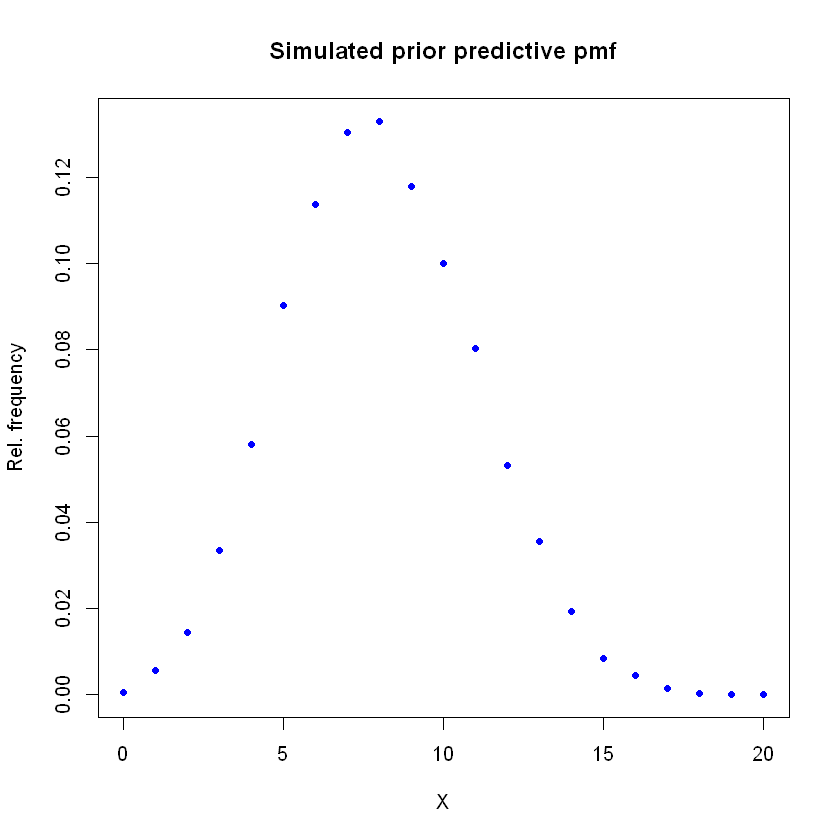

In [11]:
options(repr.plot.width=7,repr.plot.height=7)
X<-0:20
plot(X,f,type="p",pch=19,cex=0.8,col="blue",main="Simulated prior predictive pmf",ylab="Rel. frequency")

Now assume we experiment with $n=20$ patients and we observe that $x=15$ of them respond to the drug treatment. 

The posterior $\theta$ distribution, **including this new evidence,** is:

$$
    \mbox{Beta}(\alpha+x,\beta+n-x)=\mbox{Beta}(9.2+15,13.8+20-15)=\mbox{Beta}(24.2,18.8),
$$

which has $\mu=0.56$, $\sigma=0.075$, a larger mean than our prior (consistent with the large observed number) and a smaller standard deviation (reflecting that we have increased information about the experiment).

### Exercise

Now consider further experimentation with this drug, after this first result. 

We test it with 40 new patients, being aware that funding will continue if we observe 25 or more successes in this trial. 

What is the probability of this result?

_Indication:_

Generate a sample from the posterior pdf of $\theta$.

Then, analogously to the above **prior predictive distribution** simulation,    
generate a simulated sample from the **posterior predictive distribution.**